In [15]:
from pathlib import Path

import cv2
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [157]:
notebook_path = Path.cwd()
base_dir = notebook_path.parent
DATA_DIR = Path(base_dir, "data")
RESULTS_DIR = Path(base_dir, "results")

In [158]:
bbdd = "crm_vision"

with open(DATA_DIR / f"{bbdd}_info_client.pickle", 'rb') as handle:
    unserialized_df = pickle.load(handle)
df_infoclients = pd.DataFrame(unserialized_df)

In [159]:
df_infoclients

,object_id,name,type_client,recomendation,descount,last_visit
0,1,Jhohana,Leal,Salud y Belleza,20% cat belleza,30 dias
1,2,Geraldin,Impulsivo,Novedades Moda Textil,20% nueva temporada,40 dias
2,3,Julian,Nuevo,Deportes,15% suplementos,No registra
3,4,Cristian,Leal,Tecnologia,10% laptops,10 dias


In [166]:
img_notification = cv2.imread(str(Path(DATA_DIR, "assets","notification.png")))
img_notification = cv2.cvtColor(img_notification, cv2.COLOR_BGR2RGB)

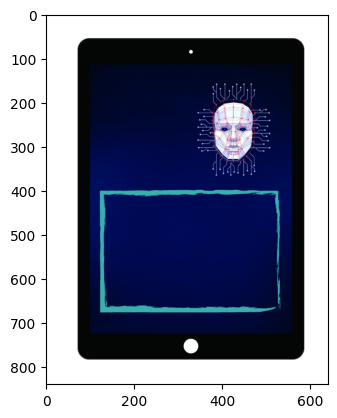

In [167]:
plt.imshow(img_notification)

In [168]:
width = 100
height = 100

crop_img = cv2.imread(str(Path(RESULTS_DIR, "img_crop", "2.02022-12-18 22:23:51.642667.jpg")))
cropped_face = cv2.resize(crop_img, (width, height))

In [169]:
df_info = df_infoclients[df_infoclients["object_id"]==1]

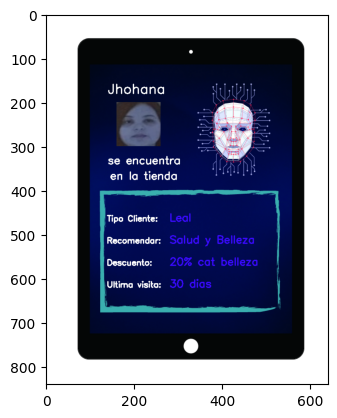

In [170]:
x_titles = 138
x_info = 280

y_init = 470
y_delta = 50

size_titles = 0.6

color_titles = (255, 255, 255)

cv2.putText(img_notification, df_info["name"].values[0], (140, 180), cv2.FONT_HERSHEY_SIMPLEX,
    1, color_titles, 2)
cv2.putText(img_notification, "se encuentra", (140, 340), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, color_titles, 2)
cv2.putText(img_notification, "en la tienda", (145, 375), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, color_titles, 2)

cv2.putText(img_notification, "Tipo Cliente: ", (x_titles, y_init), cv2.FONT_HERSHEY_SIMPLEX,
        size_titles, color_titles, 2)
cv2.putText(img_notification, df_info["type_client"].values[0], (x_info, y_init), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, (58, 10, 255), 2)

cv2.putText(img_notification, "Recomendar: ", (x_titles, y_init+y_delta), cv2.FONT_HERSHEY_SIMPLEX,
        size_titles, color_titles, 2)
cv2.putText(img_notification, df_info["recomendation"].values[0], (x_info, y_init+y_delta), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, (58, 10, 255), 2)

cv2.putText(img_notification, "Descuento: ", (x_titles, y_init+y_delta*2), cv2.FONT_HERSHEY_SIMPLEX,
        size_titles, color_titles, 2)
cv2.putText(img_notification, df_info["descount"].values[0], (x_info, y_init+y_delta*2), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, (58, 10, 255), 2)

cv2.putText(img_notification, "Ultima visita: ", (x_titles, y_init+y_delta*3), cv2.FONT_HERSHEY_SIMPLEX,
        size_titles, color_titles, 2)
cv2.putText(img_notification, df_info["last_visit"].values[0], (x_info, y_init+y_delta*3), cv2.FONT_HERSHEY_SIMPLEX,
        0.8, (58, 10, 255), 2)

img_notification[200:200+height, 160:160+width] = cropped_face
    
plt.imshow(img_notification)